# Load dataset

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Define paths
base_dir = 'data/1/kagglecatsanddogs_3367a/PetImages'

# Image parameters
img_height, img_width = 150, 150
batch_size = 32

In [ ]:
# Create ImageDataGenerator with data augmentation and validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0, 1]
    validation_split=0.2,     # Use 20% of data for validation
    rotation_range=20,        # Randomly rotate images
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in newly created pixels
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,      
    class_mode='binary',      # Binary classification (cat vs dog)
    subset='training',        # Use training subset
    seed=42         # Seed for reproducibility
)

# Load validation data (no augmentation, only rescaling)
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',      # Use validation subset
    seed=42
)

# Display dataset information
print(f"\nTraining samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")
print(f"Class indices: {train_generator.class_indices}")
print(f"Number of batches in training: {len(train_generator)}")
print(f"Number of batches in validation: {len(val_generator)}")

Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.

Training samples: 19968
Validation samples: 4991
Class indices: {'Cat': 0, 'Dog': 1}
Number of batches in training: 624
Number of batches in validation: 156

Training samples: 19968
Validation samples: 4991
Class indices: {'Cat': 0, 'Dog': 1}
Number of batches in training: 624
Number of batches in validation: 156



Sample Training Images:


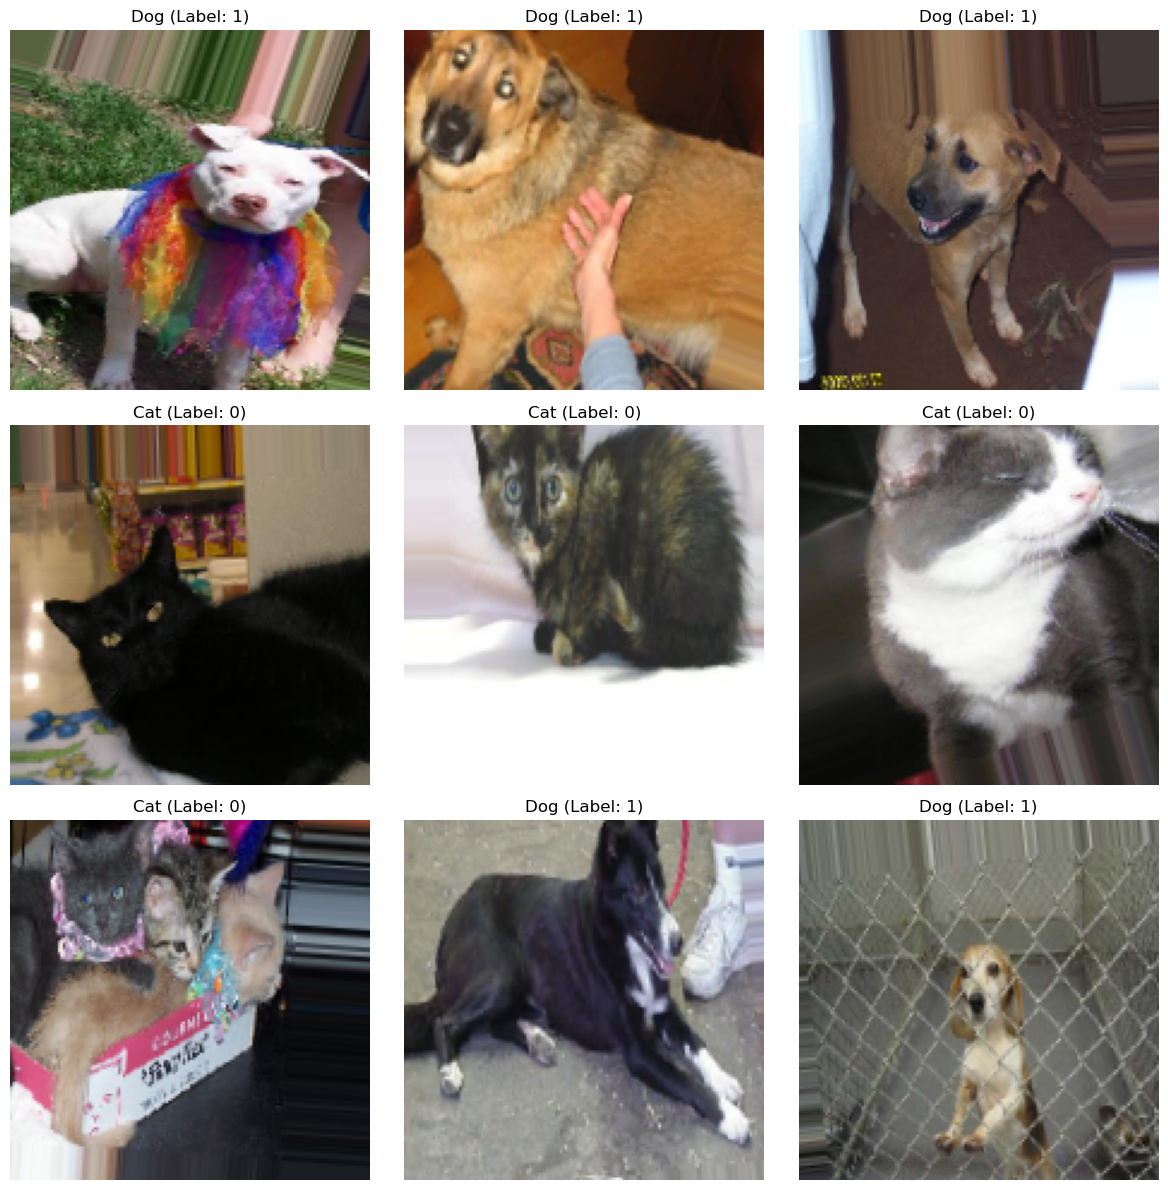

In [8]:
# Visualize sample images from the dataset
def visualize_samples(generator, num_images=9):
    """Display sample images from the generator"""
    plt.figure(figsize=(12, 12))
    
    # Get a batch of images
    images, labels = next(generator)
    
    for i in range(min(num_images, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        # Map label to class name
        class_name = 'Cat' if labels[i] == 0 else 'Dog'
        plt.title(f'{class_name} (Label: {int(labels[i])})')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize training samples
print("\nSample Training Images:")
visualize_samples(train_generator)